In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys, os
os.environ['COBAYA_NOMPI'] = 'True'
sys.path.append('/global/cscratch1/sd/sfschen/boss_analysis_joint/lss_likelihood/')

In [2]:
from cobaya.yaml          import yaml_load_file
from cobaya.samplers.mcmc import plot_progress
#
from getdist.mcsamples    import MCSamplesFromCobaya
from getdist.mcsamples    import loadMCSamples
import getdist.plots      as     gdplt
from cobaya.model import get_model

#
import os

In [3]:
# Load Planck chains
planck_samples = loadMCSamples('/global/cscratch1/sd/mwhite/Fitting/CobayaLSS/chains/planck18',\
                        settings={'ignore_rows':0.5, 'contours': [0.68, 0.95] })

In [4]:
# FS + BAO
joint_info = yaml_load_file("yamls/joint_boss.yaml")

joint_samples = loadMCSamples(os.path.abspath(joint_info["output"]),\
                        settings={'ignore_rows':0.3, 'contours': [0.68, 0.95],\
                                 })

In [5]:
pk_info = yaml_load_file("yamls/pk_z13_lnA.yaml")

pk_samples = loadMCSamples(os.path.abspath(pk_info["output"]),\
                        settings={'ignore_rows':0.3, 'contours': [0.68, 0.95],\
                                 })

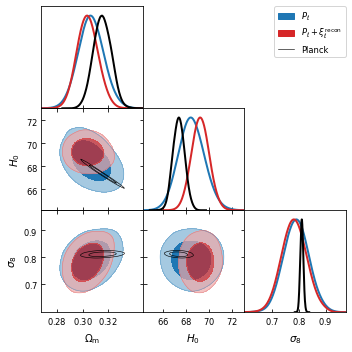

In [6]:
# Plot Together!
gdplot = gdplt.get_subplot_plotter(width_inch=5)
gdplot.settings.axes_fontsize=12
gdplot.settings.legend_fontsize=12

gdplot.triangle_plot([pk_samples, joint_samples,planck_samples],\
                     ["omegam","H0","sigma8"],\
                     filled=[True,True,False],\
                     alphas=[1.0, 0.7, 1.0],\
                     contour_args=[{'color':'C0','ls':'-'},\
                                   {'color':'C3','ls':'-'},\
                                   {'color':'k','ls':'-'}],\
                     line_args=[{'color':'C0','ls':'-','lw':2},\
                                {'color':'C3','ls':'-','lw':2},\
                                {'color':'k','ls':'-','lw':2}],\
                     linewidth_contour=3,\
                     legend_labels = [r"$P_\ell$",r"$P_\ell + \xi^{\rm recon}_\ell$","Planck"])

plt.savefig('Figures/main_results.pdf')

In [7]:
# Produce S8:
p   = joint_samples.getParams().__dict__
joint_samples.addDerived(p['sigma8']*(p['omegam']/0.3)**0.5,name='S8',label='S_8')

In [8]:
joint_samples.addDerived(p['sigma8']*(p['omegam']/0.3)**0.25,name='Sig8',label='\Sigma_8')

In [9]:
joint_samples.getLatex('Sig8')

'\\Sigma_8 = 0.786\\pm 0.049'

In [10]:
joint_samples.getLatex('S8')

'S_8 = 0.788\\pm 0.052'

In [11]:
np.sqrt(joint_samples.getVars())

array([7.85180541e-01, 8.41912165e-03, 1.18372320e-01, 6.06457987e-02,
       1.55201399e+00, 2.00337375e+00, 2.18439882e+01, 2.26389093e+01,
       9.31615581e+02, 2.45156651e+04, 5.94720887e-02, 1.91507233e+00,
       2.20900073e+00, 3.26403243e+01, 2.38385250e+01, 9.47681634e+02,
       3.30230698e+04, 3.91780911e-02, 1.16716912e+00, 1.35392222e+00,
       1.90191867e+01, 1.85467691e+01, 9.16551021e+02, 2.57973456e+04,
       5.04930569e-02, 1.36193782e+00, 1.64811653e+00, 2.50746130e+01,
       2.02875033e+01, 9.71088711e+02, 3.27199580e+04, 2.14121705e-01,
       4.07443517e-01, 1.17221634e-03, 1.39162345e-01, 2.11957262e-03,
       2.21021851e-01, 1.95038772e-01, 3.40657664e-01, 1.26674825e-03,
       1.46381405e-01, 2.26651374e-03, 2.40187885e-01, 4.72080126e-02,
       1.94152084e+00, 1.94152084e+00, 8.49292661e+00, 5.95243780e+00,
       6.05294707e+00, 5.21624370e-02, 4.94245304e-02])

In [12]:
pk_samples.getLatex()

(['H_0',
  '\\Omega_\\mathrm{m}',
  '\\log(10^{10} A_\\mathrm{s})',
  '(1+b_1^{N3})\\sigma_8',
  'b_2^{N3}',
  'b_s^{N3}',
  '\\alpha_0^{N3}',
  '\\alpha_2^{N3}',
  'SN_0^{N3}',
  'SN_2^{N3}',
  '(1+b_1^{S3})\\sigma_8',
  'b_2^{S3}',
  'b_s^{S3}',
  '\\alpha_0^{S3}',
  '\\alpha_2^{S3}',
  'SN_0^{S3}',
  'SN_2^{S3}',
  '(1+b_1^{N1})\\sigma_8',
  'b_2^{N1}',
  'b_s^{N1}',
  '\\alpha_0^{N1}',
  '\\alpha_2^{N1}',
  'SN_0^{N1}',
  'SN_2^{N1}',
  '(1+b_1^{S1})\\sigma_8',
  'b_2^{S1}',
  'b_s^{S1}',
  '\\alpha_0^{S1}',
  '\\alpha_2^{S1}',
  'SN_0^{S1}',
  'SN_2^{S1}',
  '\\sigma_8',
  '-\\log\\pi',
  '-\\log\\pi_\\mathrm{0}',
  '\\chi^2',
  '\\chi^2_\\mathrm{joint\\ boss\\ likelihoods\\ emu\\ lnA.FullShapePlusBAOEmu\\ Z3}',
  '\\chi^2_\\mathrm{joint\\ boss\\ likelihoods\\ emu\\ lnA.FullShapePlusBAOEmu\\ Z1}'],
 ['68.5\\pm 1.1',
  '0.307\\pm 0.010',
  '2.98\\pm 0.12',
  '1.767^{+0.078}_{-0.043}',
  '-2.4^{+1.5}_{-1.7}',
  '1.8^{+2.0}_{-2.3}',
  '3\\pm 22',
  '17^{+18}_{-25}',
  '-95\\pm 930',


In [16]:
joint_samples.getLatex()

(['H_0',
  '\\Omega_\\mathrm{m}',
  '\\log(10^{10} A_\\mathrm{s})',
  '(1+b_1^{N3})\\sigma_8',
  'b_2^{N3}',
  'b_s^{N3}',
  '\\alpha_0^{N3}',
  '\\alpha_2^{N3}',
  'SN_0^{N3}',
  'SN_2^{N3}',
  '(1+b_1^{S3})\\sigma_8',
  'b_2^{S3}',
  'b_s^{S3}',
  '\\alpha_0^{S3}',
  '\\alpha_2^{S3}',
  'SN_0^{S3}',
  'SN_2^{S3}',
  '(1+b_1^{N1})\\sigma_8',
  'b_2^{N1}',
  'b_s^{N1}',
  '\\alpha_0^{N1}',
  '\\alpha_2^{N1}',
  'SN_0^{N1}',
  'SN_2^{N1}',
  '(1+b_1^{S1})\\sigma_8',
  'b_2^{S1}',
  'b_s^{S1}',
  '\\alpha_0^{S1}',
  '\\alpha_2^{S1}',
  'SN_0^{S1}',
  'SN_2^{S1}',
  'B_1^{z3}',
  'F^{z3}',
  'M_0^{z3}',
  'M_1^{z3}',
  'Q_0^{z3}',
  'Q_1^{z3}',
  'B_1^{z1}',
  'F^{z1}',
  'M_0^{z1}',
  'M_1^{z1}',
  'Q_0^{z1}',
  'Q_1^{z1}',
  '\\sigma_8',
  '-\\log\\pi',
  '-\\log\\pi_\\mathrm{0}',
  '\\chi^2',
  '\\chi^2_\\mathrm{joint\\ boss\\ likelihoods\\ emu\\ lnA.FullShapePlusBAOEmu\\ Z3}',
  '\\chi^2_\\mathrm{joint\\ boss\\ likelihoods\\ emu\\ lnA.FullShapePlusBAOEmu\\ Z1}',
  'S_8',
  '\\Sigma_8'

In [13]:
# Make plots of the best fit models:
# First find them:
base = joint_info['output']
N_params = len(joint_info['params'])
chi2ii = 2 + N_params

file = np.genfromtxt(base+'.%d.txt'%(1),names=True)
var_names = file.dtype.names
#var_names = var_names[2:(2+N_params)]
#print(var_names)
del file


In [14]:
# Cut out sigma8 onwards since we don't need it to compute model
var_names = var_names[2:-6]

In [15]:
mcmc = []

for ii in range(8):
    mcmc += [ np.loadtxt(base+'.%d.txt'%(ii+1)) ]

mcmc = np.concatenate(mcmc)

KeyboardInterrupt: 

In [ ]:
chi2s = mcmc[:,-3]
ii = np.argmin(chi2s)
bfs = mcmc[ii,2:-6]
pars = dict(zip(var_names,bfs))

In [ ]:
chi2s[ii] / (18*2 * 4 + 10*2*2 - 43)

In [ ]:
18*2 * 2 + 10*2 - 23

In [ ]:
chi2s[ii]

In [ ]:
for par in pars:
    print(par,': ', pars[par])

In [ ]:
# Run Model Class
model = get_model(joint_info)

logposterior = model.logposterior(pars)
print(logposterior)

In [ ]:
# List likelihoods:
likelihood_names = list(model.likelihood.keys())
print(likelihood_names)

likz3 = model.likelihood[likelihood_names[0]]
likz1 = model.likelihood[likelihood_names[1]]

In [ ]:
# Look at data:
kdat = likz3.kdats
p0dat = likz3.p0dats
p2dat = likz3.p2dats
#errs = np.diag(likz3.cov)**0.5
errs = np.diag(np.loadtxt(likz3.covfn))**0.5

In [ ]:
# Compare to best fit:
sname = 'NGCz3'
pconv = likz3.pconv[sname]

In [ ]:
plt.errorbar(kdat[sname], kdat[sname] * p0dat[sname], yerr=kdat[sname] * errs[:40], fmt = 'o')
plt.errorbar(kdat[sname], kdat[sname] * p2dat[sname], yerr=kdat[sname] * errs[40:80], fmt = 'o')

plt.plot(kdat[sname], kdat[sname] * pconv[:40], 'C0--')
plt.plot(kdat[sname], kdat[sname] * pconv[40:], 'C1--')

plt.xlim(0.02,0.2)
plt.ylim(0,2200)

plt.xlabel('k [h/Mpc]')
plt.ylabel(r'$k P_\ell$ [(Mpc/h)$^2$]')

In [ ]:
# Correlation function:
sname = 'z3'
rdat = likz3.rdats[sname]
xi0dat = likz3.xi0dats[sname]
xi2dat = likz3.xi2dats[sname]
#errs = np.diag(likz3.cov)**0.5

In [ ]:
xith = likz3.xith[sname]

In [ ]:
plt.errorbar(rdat, rdat**2 * xi0dat, yerr=rdat**2 * errs[160:196], fmt = 'o')
plt.errorbar(rdat, rdat**2 * xi2dat, yerr=rdat**2 * errs[196:], fmt = 'o')

plt.plot(rdat, rdat**2 * xith[:36], 'C0')
plt.plot(rdat, rdat**2 * xith[36:], 'C1')

plt.fill_between([50,80],[100,100],[-100,-100],color='k',alpha=0.1)
plt.fill_between([130,150],[100,100],[-100,-100],color='k',alpha=0.1)

plt.xlim(50,150)
plt.ylim(-10,65)

In [ ]:
# All at once now:
fig, axs = plt.subplots(2, figsize=(6,5))

# Pk
sname = 'NGCz3'
pconv = likz3.pconv[sname]

axs[0].plot(-1000,1000,'w',label='NGCz3')
axs[0].errorbar(kdat[sname], kdat[sname] * p0dat[sname], yerr=kdat[sname] * errs[:40], fmt = 'o',label=r'$\ell=0$')
axs[0].errorbar(kdat[sname], kdat[sname] * p2dat[sname], yerr=kdat[sname] * errs[40:80], fmt = 'o',label=r'$\ell=2$')

axs[0].plot(kdat[sname], kdat[sname] * pconv[:40], 'C0--')
axs[0].plot(kdat[sname], kdat[sname] * pconv[40:], 'C1--')

axs[0].set_xlim(0.02,0.2)
axs[0].set_ylim(0,2300)
axs[0].legend(ncol=3)

axs[0].set_xlabel('k [h/Mpc]')
axs[0].set_ylabel(r'$k P_\ell$ [(Mpc/h)$^2$]')


# xi
sname = 'z3'
rdat = likz3.rdats[sname]
xi0dat = likz3.xi0dats[sname]
xi2dat = likz3.xi2dats[sname]

xith = likz3.xith[sname]

axs[1].errorbar(rdat, rdat**2 * xi0dat, yerr=rdat**2 * errs[160:196], fmt = 'o')
axs[1].errorbar(rdat, rdat**2 * xi2dat, yerr=rdat**2 * errs[196:], fmt = 'o')

axs[1].plot(rdat, rdat**2 * xith[:36], 'C0')
axs[1].plot(rdat, rdat**2 * xith[36:], 'C1')

axs[1].fill_between([50,80],[100,100],[-100,-100],color='k',alpha=0.1)
axs[1].fill_between([130,150],[100,100],[-100,-100],color='k',alpha=0.1)
axs[1].plot(-1000,1000,'w',label='BOSSz3')
axs[1].legend()

axs[1].set_xlim(50,150)
axs[1].set_ylim(-10,65)

axs[1].set_xlabel('r [Mpc/h]')
axs[1].set_ylabel(r'$i^\ell r^2 \xi_\ell$ [(Mpc/h)$^2$]')

plt.tight_layout()

plt.savefig('Figures/best_fit_demo.pdf')